In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import kagglehub

In [4]:
# Base de dados
path = kagglehub.dataset_download("anandshaw2001/netflix-movies-and-tv-shows")
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/anandshaw2001/netflix-movies-and-tv-shows/versions/1


['netflix_titles.csv']

In [3]:
path = '/root/.cache/kagglehub/datasets/anandshaw2001/netflix-movies-and-tv-shows/versions/1'
df_path = pd.read_csv(path + '/netflix_titles.csv')
df_path.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
num_linhas = df_path.shape[0]
print(f"O dataset possui {num_linhas} linhas.")

O dataset possui 8807 linhas.


In [5]:
df_path.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Como temos muitos valores nulos vamos analisar a tabela evitando de usar essas colunas. Vamos olhar para a distribuição de filmes e series produzidas

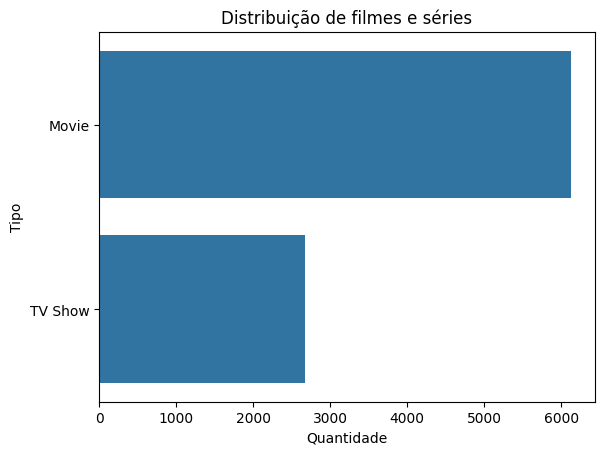

In [9]:
sns.countplot(df_path['type'])
plt.title('Distribuição de filmes e séries')
plt.xlabel('Quantidade')
plt.ylabel('Tipo')
plt.show()

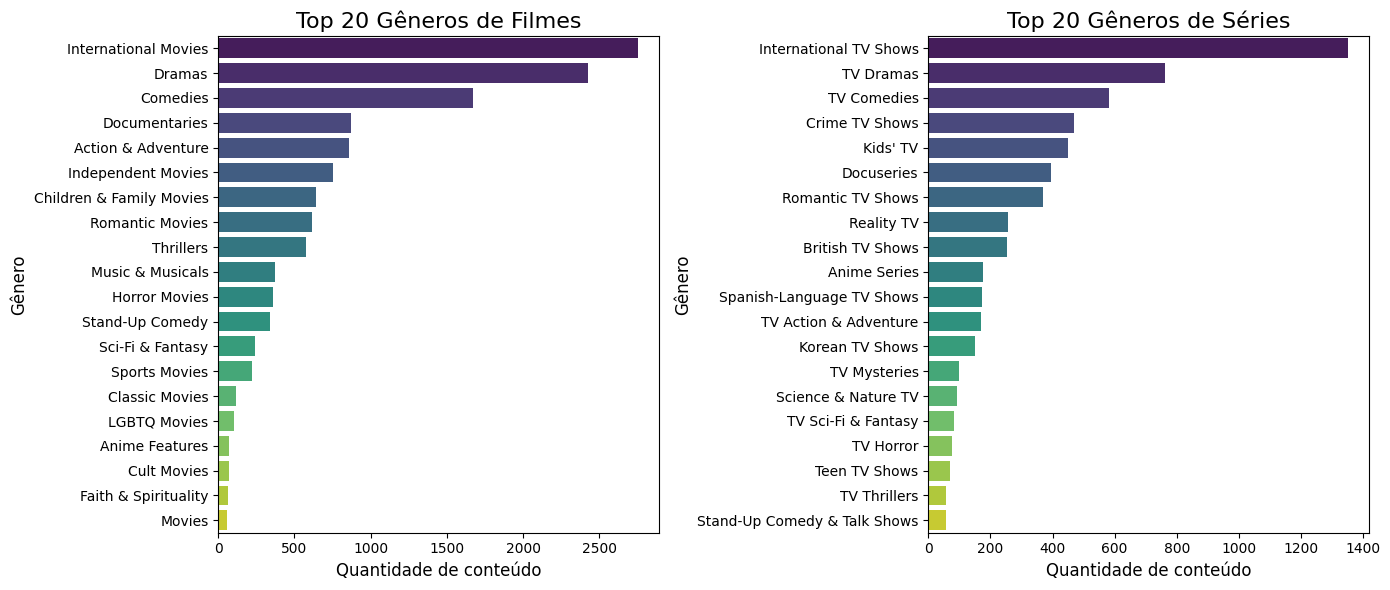

In [45]:
df_movies = df_path[df_path['type'] == 'Movie']
df_series = df_path[df_path['type'] == 'TV Show']

# Extraindo e contando os gêneros para filmes
genres_movies = df_movies['listed_in'].str.split(', ').explode()
top_genres_movies = genres_movies.value_counts().head(20)

# Extraindo e contando os gêneros para séries
genres_series = df_series['listed_in'].str.split(', ').explode()
top_genres_series = genres_series.value_counts().head(20)

# Plotando gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para filmes
sns.barplot(x=top_genres_movies.values, y=top_genres_movies.index, hue=top_genres_movies.index, palette='viridis', ax=axes[0], legend=False)
axes[0].set_title('Top 20 Gêneros de Filmes', fontsize=16)
axes[0].set_xlabel('Quantidade de conteúdo', fontsize=12)
axes[0].set_ylabel('Gênero', fontsize=12)

# Gráfico para séries
sns.barplot(x=top_genres_series.values, y=top_genres_series.index, hue=top_genres_series.index, palette='viridis', ax=axes[1], legend=False)
axes[1].set_title('Top 20 Gêneros de Séries', fontsize=16)
axes[1].set_xlabel('Quantidade de conteúdo', fontsize=12)
axes[1].set_ylabel('Gênero', fontsize=12)

plt.tight_layout()
plt.show()

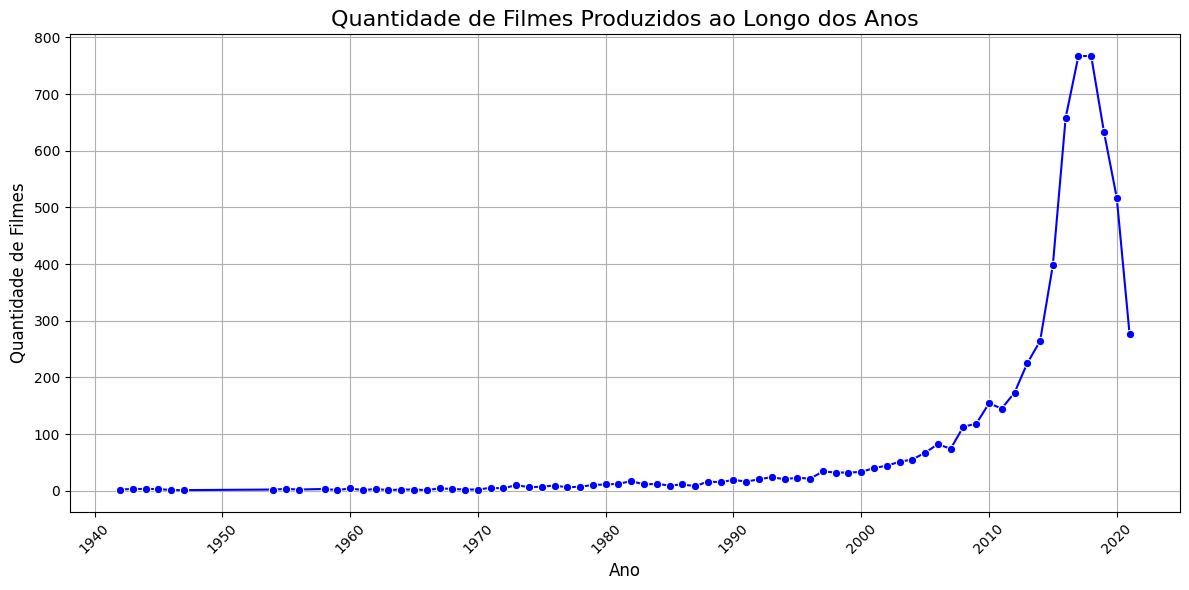

In [41]:
movies_per_year = df_movies['release_year'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o', color='b')

# Personalizando o gráfico
plt.title('Quantidade de Filmes Produzidos ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Filmes', fontsize=12)
plt.xticks(rotation=45)  # Rotaciona os anos para melhor visualização
plt.grid(True)

plt.tight_layout()
plt.show()

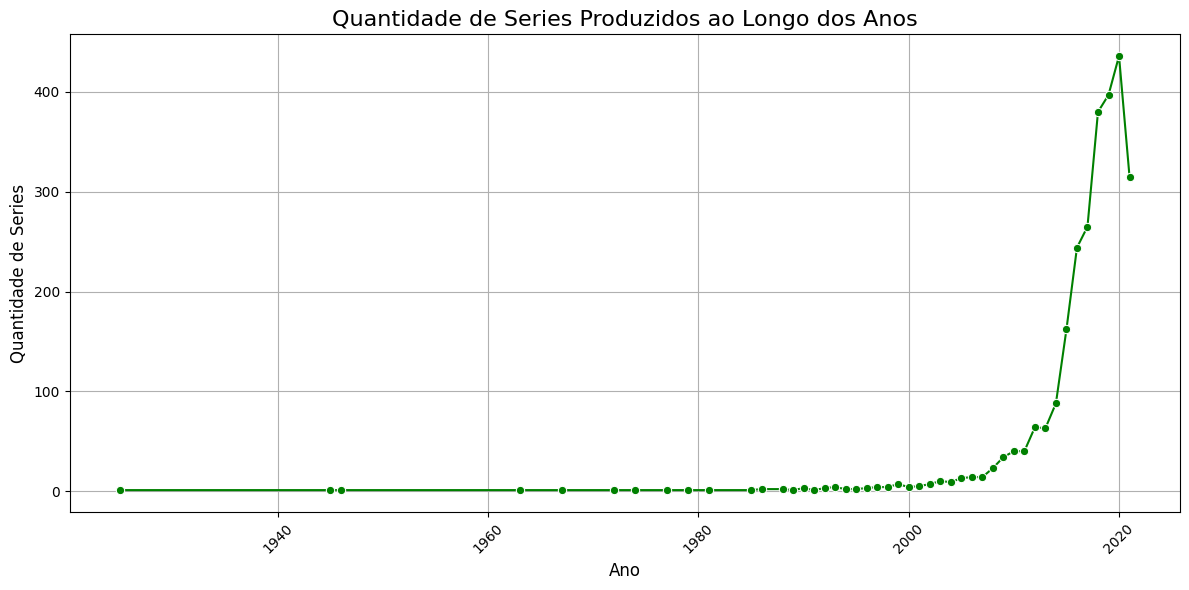

In [42]:
series_per_year = df_series['release_year'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=series_per_year.index, y=series_per_year.values, marker='o', color='g')

# Personalizando o gráfico
plt.title('Quantidade de Series Produzidos ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Series', fontsize=12)
plt.xticks(rotation=45)  # Rotaciona os anos para melhor visualização
plt.grid(True)

plt.tight_layout()
plt.show()